<a href="https://colab.research.google.com/github/katoyu/image-processing-100training/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF31_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_31_40/imori_gray.jpg
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_31_40/imori.jpg
  
from google.colab.patches import cv2_imshow

--2019-04-07 16:09:46--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_31_40/imori_gray.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8973 (8.8K) [image/jpeg]
Saving to: ‘imori_gray.jpg’

imori_gray.jpg      100%[===================>]   8.76K  --.-KB/s    in 0s      

2019-04-07 16:09:46 (94.4 MB/s) - ‘imori_gray.jpg’ saved [8973/8973]

--2019-04-07 16:09:48--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_31_40/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 

#31 アフィン変換(スキュー)

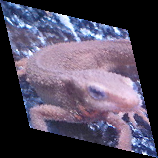

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

_img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = _img.shape

dx = 30.
dy = 30.
a = 1.
b = dx/H
c = dy/W
d = 1.
tx = 0.
ty = 0.

img = np.zeros((H+2, W+2, C), dtype=np.float32)
img[1:H+1, 1:W+1] = _img

H_new = np.ceil(dy + H).astype(np.int)
W_new = np.ceil(dx + W).astype(np.int)
out = np.zeros((H_new, W_new, C), dtype=np.float32)

x_new = np.tile(np.arange(W_new), (H_new, 1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

adbc = a * d - b * c
x = np.round((d * x_new - b * y_new) / adbc).astype(np.int) - tx + 1
y  =np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

out[y_new, x_new] = img[y, x]
out = out.astype(np.uint8)

cv2_imshow(out)